In [1]:
import zipfile
with zipfile.ZipFile("creditcardfraud.zip","r") as z:
    z.extractall()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics, preprocessing
%matplotlib inline

In [5]:
df = pd.read_csv("creditcard.csv")

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
df.Class.unique()

array([0, 1])

In [9]:
X = df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']].values
X[0:5]

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02,
         2.53634674e+00,  1.37815522e+00, -3.38320770e-01,
         4.62387778e-01,  2.39598554e-01,  9.86979013e-02,
         3.63786970e-01,  9.07941720e-02, -5.51599533e-01,
        -6.17800856e-01, -9.91389847e-01, -3.11169354e-01,
         1.46817697e+00, -4.70400525e-01,  2.07971242e-01,
         2.57905802e-02,  4.03992960e-01,  2.51412098e-01,
        -1.83067779e-02,  2.77837576e-01, -1.10473910e-01,
         6.69280749e-02,  1.28539358e-01, -1.89114844e-01,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01,
         1.66480113e-01,  4.48154078e-01,  6.00176493e-02,
        -8.23608088e-02, -7.88029833e-02,  8.51016549e-02,
        -2.55425128e-01, -1.66974414e-01,  1.61272666e+00,
         1.06523531e+00,  4.89095016e-01, -1.43772296e-01,
         6.35558093e-01,  4.63917041e-01, -1.14804663e-01,
        -1.83361270e-01, -1.45783041e-01, -6.90831352e-

In [10]:
y = df['Class'].values
y[:5]

array([0, 0, 0, 0, 0])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [13]:
from sklearn import svm

In [14]:
s_v_m = svm.SVC(kernel = 'rbf')

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4)

In [18]:
X_test.shape

(71202, 30)

In [19]:
X_train.shape

(213605, 30)

In [20]:
y_train.shape

(213605,)

In [21]:
y_test.shape

(71202,)

In [22]:
s_v_m.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
y_predict = s_v_m.predict(X_test)

In [27]:
metrics.accuracy_score(y_test, y_predict)

0.99830060953344

In [28]:
print("Percentage accuracy on unseen data is : ", metrics.accuracy_score(y_test, y_predict) * 100)

Percentage accuracy on unseen data is :  99.830060953344


In [29]:
y_predict = s_v_m.predict(X_train)

In [30]:
metrics.accuracy_score(y_train, y_predict)

0.9982631492708504

In [31]:
print("Percentage accuracy on seen data is : ", metrics.accuracy_score(y_train, y_predict) * 100)

Percentage accuracy on seen data is :  99.82631492708504


In [33]:
from sklearn.metrics import f1_score
f1_score(y_train,y_predict, average='weighted')

0.9973954787243926

In [35]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_train, y_predict)

0.9982631492708504

In [47]:
y_predict = s_v_m.predict(X_test)

In [37]:
from sklearn.metrics import f1_score
f1_score(y_test,y_predict, average='weighted')

0.9974516368961359

In [39]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, y_predict)

0.99830060953344

In [40]:
from sklearn.metrics import plot_confusion_matrix

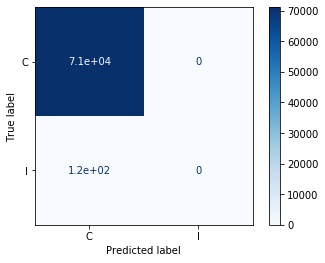

In [44]:
disp = plot_confusion_matrix(s_v_m, X_test, y_test, display_labels= df.columns[-1], cmap = plt.cm.Blues, normalize = None)

In [50]:
# str(df)

In [45]:
from sklearn.metrics import jaccard_score

In [49]:
jaccard_score(y_test,y_predict, average = 'weighted')

0.9966041069948379

In [121]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [122]:
# now as we see non fradulent transactions are very high so upper algo will not be efficient 
# so now divide the dataframe into equivalent values

In [52]:
a = df[df["Class"] == 0].sample(500)

In [55]:
a.shape

(500, 31)

In [109]:
b = df[df['Class'] == 1].sample(492)

In [110]:
df2 = a.append(b)

In [111]:
df2 = df2.sample(992)

In [112]:
x = df2[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']].values

In [113]:
x[:5]

array([[ 5.02580000e+04, -7.58043467e-02, -5.38141714e-01,
         1.71094667e+00, -2.35254985e+00, -9.94628428e-01,
        -8.68447357e-01,  8.66551469e-02, -3.98321284e-01,
        -2.16596355e+00,  9.97440526e-01, -4.95923923e-01,
        -7.68169311e-01,  1.20213769e+00, -8.63284523e-01,
        -1.89658073e-02, -1.65934020e-01, -3.61941583e-03,
        -8.01116542e-02, -7.96483251e-01, -1.35899061e-01,
        -2.35280645e-01, -2.53336290e-01,  2.42380241e-01,
         3.42287694e-01, -8.59199070e-01, -7.01012220e-01,
         1.85942384e-02, -2.83169701e-02,  6.00000000e+01],
       [ 1.16067000e+05,  9.49240655e-01,  1.33351901e+00,
        -4.85540201e+00,  1.83500588e+00, -1.05324529e+00,
        -2.56282607e+00, -2.28698563e+00,  2.60906490e-01,
        -8.95365546e-01, -4.54261204e+00,  2.45371038e+00,
        -4.92519870e+00, -1.20041197e+00, -6.42437211e+00,
         1.01489749e+00, -3.12942132e+00, -5.14703878e+00,
        -1.81543653e+00,  5.20496923e-01,  4.24608329e-

In [114]:
y = df2['Class'].values

In [115]:
y.shape

(992,)

In [116]:
# 1 is for fraudulent detection and 0 for true

In [117]:
X_train, X_test, y_train, y_test = train_test_split(x , y, random_state = 4)

In [118]:
s_v_m_2 = svm.SVC(kernel='rbf')

In [119]:
s_v_m_2.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [123]:
y_predict = s_v_m_2.predict(X_test)

In [124]:
metrics.accuracy_score(y_test, y_predict)

0.5

In [126]:
# accuracy of judgement drops heavily

In [127]:
metrics.jaccard_score(y_test, y_predict)

0.25301204819277107

In [128]:
metrics.f1_score(y_test, y_predict)

0.4038461538461538

In [132]:
aa = metrics.precision_score(y_test, y_predict)

In [133]:
bb = metrics.recall_score(y_test, y_predict)

In [135]:
fscore = (2 * (aa * bb )) / (aa + bb)

In [137]:
fscore

0.4038461538461538

In [145]:
from sklearn.neighbors import KNeighborsClassifier
n = KNeighborsClassifier(n_neighbors=4)
n.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [146]:
yyy = n.predict(X_test)

In [147]:
metrics.accuracy_score(y_test, yyy)

0.6290322580645161

In [148]:
# using knn classifier gives better precision